In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 3]
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams.update({'font.size': 10})



## Question b)
**Influence of kLa over the oxygen concentration in the system**

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


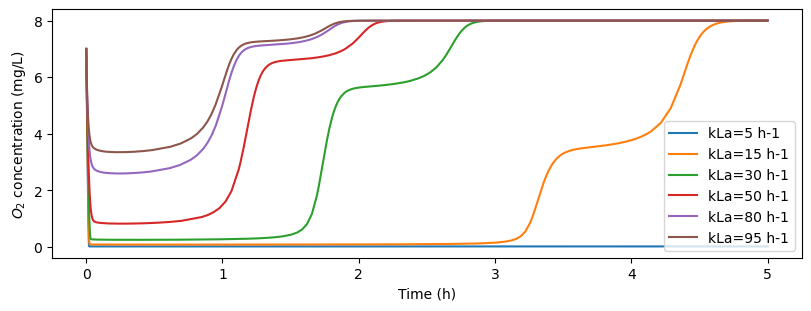

In [6]:
vm1 = 125  # h^-1
vm2 = 75   # h^-1
K1 = 5     # mg/L
K2 = 3     # mg/L
KO1 = 0.25 # mg/L
KO2 = 0.5  # mg/L
CS1_0 = 100  # mg/L   
CL_0 = 7    # mg/L
CLstar = 8  # mg/L
Y_OS1 = 3.5   # Coefficient à définir
Y_OS2 = 1.1   # Coefficient à définir


def equations(t, var):
    CS1, CS2, CS3, CL = var
    
    r1 = vm1 * (CS1 / (K1 + CS1)) * (CL / (KO1 + CL))
    r2 = vm2 * (CS2 / (K2 + CS2)) * (CL / (KO2 + CL))
    
    RS1 = -r1
    RS2 = r1 - r2
    RS3 = r2
    
    dCS1 = RS1
    dCS2 = RS2
    dCS3 = RS3
    dCL = kLa * (CLstar - CL) - Y_OS1 * r1 - Y_OS2 * r2 
    
    return [dCS1, dCS2, dCS3, dCL]

t_span = [0, 5]
in_cond = [CS1_0, 0, 0, CL_0]

kLa_range = np.array([5, 15, 30, 50, 80, 95])
CL_range = []
t_range = []

for i, val in enumerate(kLa_range):
    kLa= val
    sol = solve_ivp(equations, t_span, in_cond, method="BDF")
    t = sol.t
    CS1, CS2, CS3, CL = sol.y
    CL_range.append(CL) #list storing the Cl concentration profile for each kLa value 
    t_range.append(t)
    


fig, ax = plt.subplots()
for i, val in enumerate (CL_range):
    ax.plot(t_range[i], CL_range[i], label=f'kLa={kLa_range[i]} h-1')

ax.set_xlabel('Time (h)')
ax.set_ylabel(r'$O_2$ concentration (mg/L)')
ax.legend()
fig.savefig('CLwithkLa.eps')
plt.show()



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


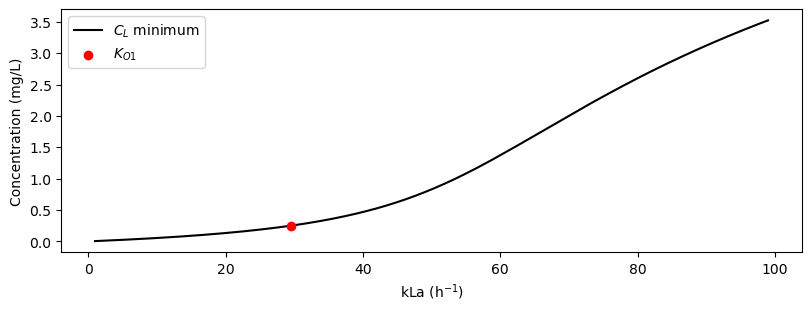

Limit kLa value = 29.53h-1


In [11]:
t_span = [0, 5]
in_cond = [CS1_0, 0, 0, CL_0]

kLa_range = np.linspace(1,99,499)
CL_range = []
t_range = []
CL_min = []

for i, val in enumerate(kLa_range):
    kLa= val
    sol = solve_ivp(equations, t_span, in_cond, method="BDF")
    t = sol.t
    CS1, CS2, CS3, CL = sol.y
    CL_range.append(CL) #each element of the list is a numpy array of CL for a specific kLa value 
    t_range.append(t)
    CL_min.append(np.min(CL)) #the minimum value of the oxygen profile for each kLa is stored in this list. With the limit kLa, the minimum should not go below the value of KO1 
    
arrCL_min = np.array(CL_min)


kLa_limit = kLa_range[arrCL_min>KO1][0]
kLa_limit_index = np.where(kLa_range == kLa_limit)[0][0]

plt.plot(kLa_range, CL_min, c='black', label='$C_L$ minimum')
plt.scatter(kLa_limit, CL_min[kLa_limit_index], color='red', zorder=5, label=r'$K_{O1}$')
plt.ylabel('Concentration (mg/L)')
plt.xlabel(r'kLa (h$^{-1}$)')
plt.legend()
plt.savefig('CLmin_with_kLa.eps')
plt.show()


print(f'Limit kLa value = {kLa_limit:.2f}h-1')

## Question c) 
**Concentration profile for the limit kLa value derived above** 

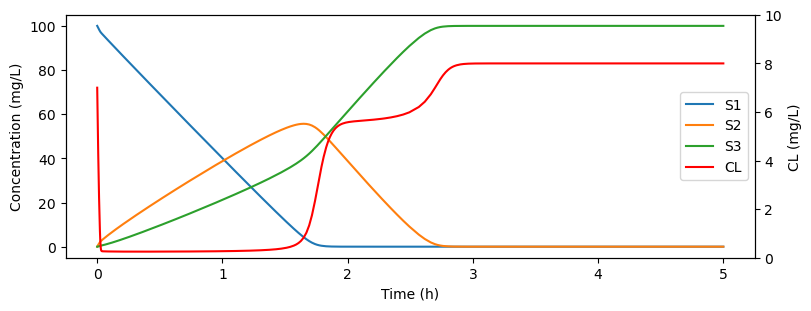

In [12]:
kLa = kLa_limit

t_span = [0, 5]
in_cond = [CS1_0, 0, 0, CL_0]

sol = solve_ivp(equations, t_span, in_cond, method="BDF")
t = sol.t
CS1, CS2, CS3, CL = sol.y


fig, ax = plt.subplots()
line1, = ax.plot(t, CS1, label='S1')
line2, = ax.plot(t, CS2, label='S2')
line3, = ax.plot(t, CS3, label='S3')
ax.set_xlabel('Time (h)')
ax.set_ylabel('Concentration (mg/L)')

ax1 = ax.twinx() 
line4, = ax1.plot(t, CL, label='CL', color='red')
ax1.set_ylabel('CL (mg/L)')
ax1.set_ylim([0, 10])
lines = [line1, line2, line3, line4]
labels = [line.get_label() for line in lines]
ax.legend(lines, labels, loc='best')
#fig.savefig('C_with_kLa_lim.eps')
plt.show()


**Concentration profile when the mass transfer rate is not limiting, i.e when $C_L = C_L^*$**

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


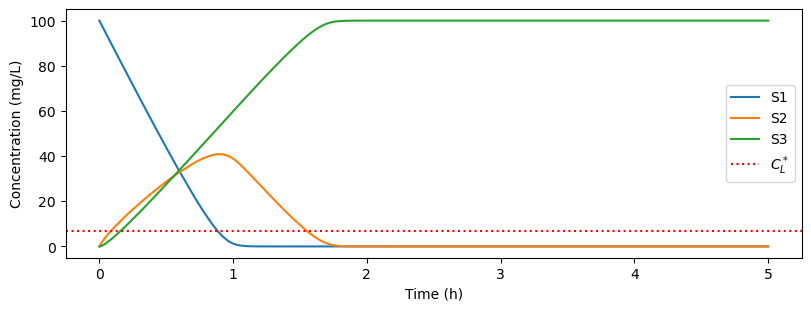

Time required to deplete NH4+ =1.22 h


In [13]:
kLa = kLa_limit
CL=7 #always remain equal to saturation value

def equations(t, var):
    CS1, CS2, CS3= var
    
    r1 = vm1 * (CS1 / (K1 + CS1)) * (CL / (KO1 + CL))
    r2 = vm2 * (CS2 / (K2 + CS2)) * (CL / (KO2 + CL))
    
    RS1 = -r1
    RS2 = r1 - r2
    RS3 = r2
    
    dCS1 = RS1
    dCS2 = RS2
    dCS3 = RS3
    
    return [dCS1, dCS2, dCS3]

t_span = [0, 5]
in_cond = [CS1_0, 0, 0]

sol = solve_ivp(equations, t_span, in_cond, method="BDF")
t = sol.t
CS1, CS2, CS3 = sol.y


fig, ax = plt.subplots()
ax.plot(t, CS1, label='S1')
ax.plot(t, CS2, label='S2')
ax.plot(t, CS3, label='S3')
ax.axhline(y=7, label=r'$C_L^*$', c='r', linestyle=':')
ax.set_xlabel('Time (h)')
ax.set_ylabel('Concentration (mg/L)')
ax.legend()
fig.savefig('C_with_noCLlimitation.eps')
plt.show()

t_depletion = t[CS1<=0.01][0]
print(f'Time required to deplete NH4+ ={t_depletion:.2f} h', )